# Project 2 - Finance

### DESCRIPTION

#### Problem Statement
- Finance Industry is the biggest consumer of Data Scientists. It faces constant attack by fraudsters, who try to trick the system. Correctly identifying fraudulent transactions is often compared with finding needle in a haystack because of the low event rate. 
- It is important that credit card companies are able to recognize fraudulent credit card transactions so that the customers are not charged for items that they did not purchase.
You are required to try various techniques such as supervised models with oversampling, unsupervised anomaly detection, and heuristics to get good accuracy at fraud detection.

#### Dataset Snapshot

The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset represents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

### Project Task: Week 1

#### Exploratory Data Analysis (EDA):
- Perform an EDA on the Dataset.
      - Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean) with unit standard deviation
      - Find if there is any connection between Time, Amount, and the transaction being fraudulent.
- Check the class count for each class. It’s a class Imbalance problem.
- Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.
       - Oversampling or undersampling can be used to tackle the class imbalance problem
       - Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets multiplied as the low-proportionate class is mimicked multiple times.
- Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [2]:
# read data
df_train_original = pd.read_csv('./dataset/train_data.csv')
df_dev_original = pd.read_csv('./dataset/test_data_hidden.csv')
df_test_original = pd.read_csv('./dataset/test_data.csv')

In [3]:
print(df_train_original.shape)
print(df_dev_original.shape)
print(df_test_original.shape)

(227845, 31)
(56962, 31)
(56962, 30)


In [4]:
# df_train_original.dtypes

In [5]:
# df_dev_original.dtypes

In [6]:
# df_test_original.dtypes

In [7]:
# Rows containing train duplicate data
duplicate_rows_df_train_original = df_train_original[df_train_original.duplicated()]
print("number of duplicate train rows: ", duplicate_rows_df_train_original.shape)

number of duplicate train rows:  (745, 31)


In [8]:
# Rows containing test hidden duplicate data
duplicate_rows_df_dev_original = df_dev_original[df_dev_original.duplicated()]
print("number of duplicate test rows: ", duplicate_rows_df_dev_original.shape)

number of duplicate test rows:  (46, 31)


In [9]:
# Rows containing test duplicate data
duplicate_rows_df_test_original = df_test_original[df_test_original.duplicated()]
print("number of duplicate test rows: ", duplicate_rows_df_test_original.shape)

number of duplicate test rows:  (46, 30)


In [10]:
# Remove duplicate entires
df_train_original = df_train_original.drop_duplicates()
df_dev_original = df_dev_original.drop_duplicates()
df_test_original = df_test_original.drop_duplicates()

In [11]:
print(df_train_original.shape)
print(df_dev_original.shape)
print(df_test_original.shape)

(227100, 31)
(56916, 31)
(56916, 30)


#### 1.a Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean)

In [12]:
df_train_original.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,227100.0,94746.494302,47495.251605,0.000000,54182.000000,84604.500000,139320.000000,172792.000000
V1,227100.0,0.001791,1.952816,-56.407510,-0.919384,0.015127,1.315237,2.454930
V2,227100.0,-0.005301,1.656315,-72.715728,-0.599724,0.064965,0.801545,22.057729
V3,227100.0,0.002509,1.508516,-32.965346,-0.888268,0.182346,1.029116,9.382558
V4,227100.0,-0.003076,1.413476,-5.683171,-0.850272,-0.021486,0.741161,16.875344
V5,227100.0,0.002376,1.363908,-42.147898,-0.689235,-0.054442,0.611081,34.801666
V6,227100.0,-0.000122,1.324954,-26.160506,-0.768359,-0.273776,0.398910,22.529298
V7,227100.0,0.001644,1.209975,-43.557242,-0.553775,0.040905,0.570641,36.877368
V8,227100.0,0.001277,1.175528,-73.216718,-0.207922,0.022600,0.326712,20.007208
V9,227100.0,-0.001757,1.094564,-13.434066,-0.644311,-0.052059,0.595705,15.594995


#### 1.b Find if there is any connection between Time, Amount, and the transaction being fraudulent.

C:\Users\iamka\anaconda3\envs\tfPractice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Time ditributions'}, xlabel='Time', ylabel='Density'>

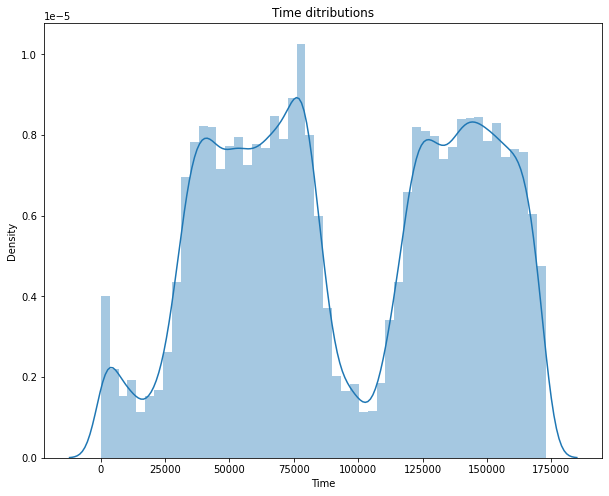

In [13]:
# visualizations of time
plt.figure(figsize=(10,8))
plt.title("Time ditributions")
sns.distplot(df_train_original.Time)

In [14]:
# The time inseconds need to converts
df_train_original['Time'] = df_train_original['Time'] / 3600
# df_train_original['Time'] = df_train_original['Time'] / 24
print(df_train_original['Time'].min())
print(df_train_original['Time'].max())

0.0
47.99777777777778


C:\Users\iamka\anaconda3\envs\tfPractice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times')

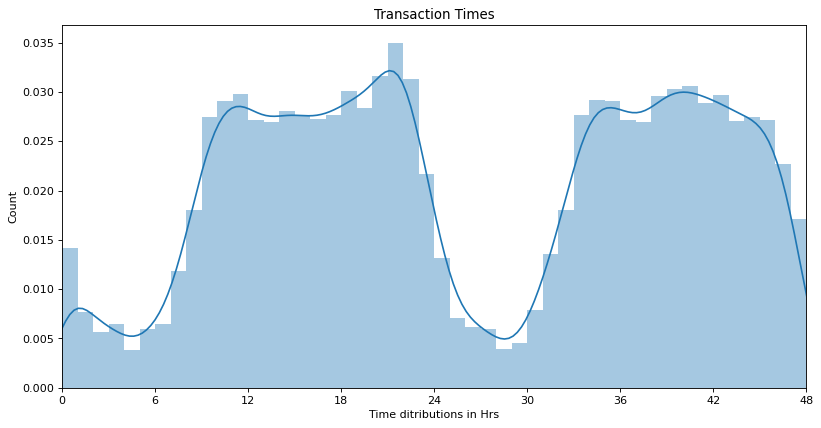

In [15]:
plt.figure(figsize=(12,6), dpi=80)
sns.distplot(df_train_original.Time, bins=48)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time ditributions in Hrs')
plt.ylabel('Count')
plt.title('Transaction Times')

C:\Users\iamka\anaconda3\envs\tfPractice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Time ditributions'}, xlabel='Amount', ylabel='Density'>

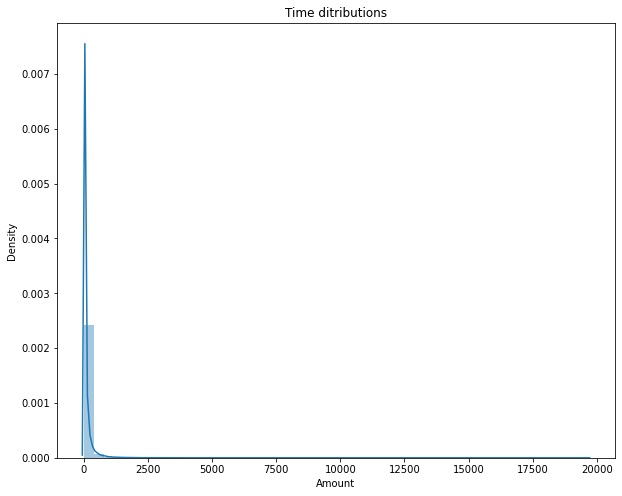

In [16]:
# visualizations of amount
plt.figure(figsize=(10,8))
plt.title("Time ditributions")
sns.distplot(df_train_original.Amount)

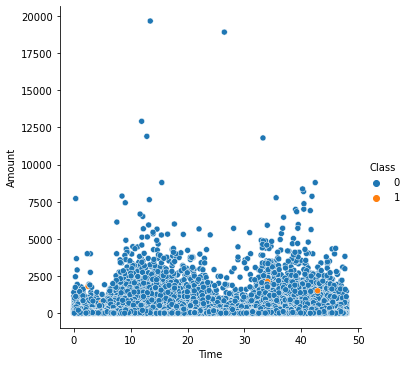

In [17]:
sns.relplot(x="Time", y="Amount", hue="Class", data=df_train_original);

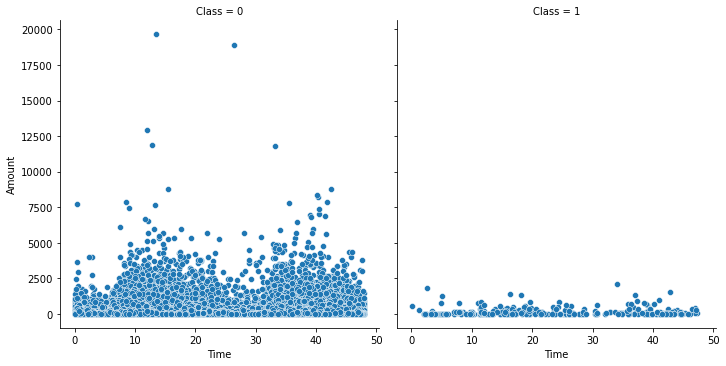

In [18]:
sns.relplot(x="Time", y="Amount", col="Class", data=df_train_original);

####   2.Check the class count for each class. It’s a class Imbalance problem.

In [19]:
df_train_original['Class'].value_counts()

0    226719
1       381
Name: Class, dtype: int64

C:\Users\iamka\anaconda3\envs\tfPractice\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

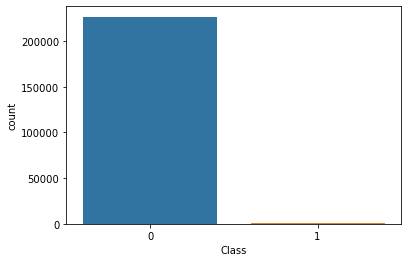

In [20]:
sns.countplot('Class', data=df_train_original)

#### 3.Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.

In [21]:
# Remove the Time,Amount 
df_train_original.drop(['Time','Amount'], axis=1, inplace=True)
df_dev_original.drop(['Time','Amount'], axis=1, inplace=True)
df_test_original.drop(['Time','Amount'], axis=1, inplace=True)

In [22]:
Y_train = df_train_original.pop('Class')
X_train = df_train_original

In [23]:
print(Y_train.shape)
print(X_train.shape)

(227100,)
(227100, 28)


In [24]:
Y_dev = df_dev_original.pop('Class')
X_dev = df_dev_original
print(Y_dev.shape)
print(X_dev.shape)

(56916,)
(56916, 28)


In [28]:
# oversampling tarin data
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, Y_train)

print(X_train_over.shape)
print(y_train_over.shape)

(453438, 28)
(453438,)


In [29]:
# undersampling tarin data
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, Y_train)

print(X_train_under.shape)
print(y_train_under.shape)

(762, 28)
(762,)


In [70]:
def modal_perfomance(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    report = classification_report(Y_test, predicted)
    print("f1_score       : ", f1_score(Y_test, predicted, average="macro"))
    print("precision_score: ", precision_score(Y_test, predicted, average="macro"))
    print("recall_score   : ", recall_score(Y_test, predicted, average="macro"))
    print("\nAccuracy Score :",accuracy_score(predicted, Y_test))
    print(report)
    plot_roc_curve(model, X_test, Y_test)  
    plt.show() 
#     roc_curve_plt(model, X_test, Y_test, predicted)

f1_score       :  0.5514650353372831
precision_score:  0.530584283700549
recall_score   :  0.9272034731735631

Accuracy Score : 0.9766849392086584
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56818
           1       0.06      0.88      0.11        98

    accuracy                           0.98     56916
   macro avg       0.53      0.93      0.55     56916
weighted avg       1.00      0.98      0.99     56916



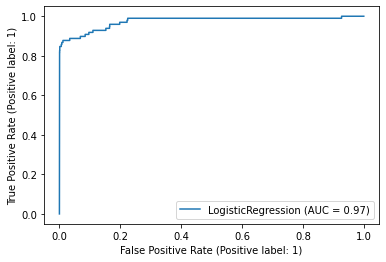

In [71]:
lr = LogisticRegression(class_weight ='balanced')
modal_perfomance(lr, X_train_over, y_train_over, X_dev, Y_dev)

### Observations: Week 1
- Traing set contains two days transaction details, the rate transaction low at night times
- The amount of transcation is highy skewed distribution, only low number count detected for high amount transcation
- There is no connection between Time, Amount, and the transaction being fraudulent
- All the fraudulent transactions are low amount
- This is highly class Imbalance problem, fraudulent transaction are very rare less than 0.17 %

### Project Task: Week 2

#### Modeling Techniques:
- Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best
- Use different Tree-based classifiers like Random Forest and XGBoost. 
       a.    Remember Tree-based classifiers work on two ideologies: Bagging or Boosting
       b.    Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and XGBboost.
- Compare the results of 1 with 2 and check if there is any incremental gain.

In [82]:
# Create logistic regression pipeline
lr_pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()), 
        ('lr', LogisticRegression())
    ]
)

In [83]:
# Create SVC pipeline
svm_pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()), 
        ('svm', SVC())
    ]
)

In [84]:
# Create Gaussian NB pipeline
gnb_pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()), 
        ('gnb', GaussianNB())
    ]
)

In [85]:
# Create Multinomial NB pipeline

mnb_pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()), 
        ('mnb', MultinomialNB())
    ]
)

In [ ]:
pipelines = [
    lr_pipeline, 
    svm_pipeline, 
    gnb_pipeline, 
    mnb_pipeline
]

In [ ]:
pipeline_dict = {
    '0' : 'LogisticRegression',
    '1' : 'SVM',
    '2' : 'Gaussian NB',
    '3' : 'Multinomial NB'
}

for pipe in pipelines:
    pipe.fit(X_train_over, y_train_over)

C:\Users\iamka\anaconda3\envs\tfPractice\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
